In [50]:
import numpy as np

def matrix_stats(mat):
    arr = np.array(mat)
    return {
        'max': np.max(arr),
        'min': np.min(arr),
        'mean': np.mean(arr),
        'std': np.std(arr),
        'sr': np.mean(arr) / np.std(arr),
        'sum': np.sum(arr)  # 新增：所有元素的和
    }

if __name__ == '__main__':
    # 后续测试用例将替换此处
    pass

In [51]:
import numpy as np

def matrix_stats(mat, ddof=0, round_decimal=4):
    """
    计算矩阵/数组的核心统计信息（支持多维列表、元组、numpy数组输入）

    参数:
        mat (list/tuple/np.ndarray): 输入数据（需为可转换为数值型的结构）
        ddof (int, 可选): 标准差自由度（0=总体标准差，1=样本标准差，默认0）
        round_decimal (int, 可选): 结果保留小数位数（默认4位）

    返回:
        dict: 包含6项统计结果的字典，键为'max'/'min'/'mean'/'std'/'sr'/'sum'

    异常:
        TypeError: 输入无法转换为数值型numpy数组
        ValueError: 输入为空矩阵
    """
    # 1. 输入转换与异常捕获
    try:
        arr = np.asarray(mat, dtype=np.float64)  # 转为数值型数组
    except (TypeError, ValueError) as e:
        raise TypeError("输入必须是可转换为数值数组的结构（如列表嵌套、numpy数组）") from e

    # 2. 空矩阵检查
    if arr.size == 0:
        raise ValueError("输入矩阵不能为空，无法计算统计量")

    # 3. 核心统计量计算
    max_val = np.max(arr)
    min_val = np.min(arr)
    mean_val = np.mean(arr)
    sum_val = np.sum(arr)
    std_val = np.std(arr, ddof=ddof)  # 支持总体/样本标准差切换
    sr_val = mean_val / std_val if std_val != 0 else np.nan  # 避免除零错误

    # 4. 结果格式化（保留指定小数位）
    return {
        'max': round(max_val, round_decimal),
        'min': round(min_val, round_decimal),
        'mean': round(mean_val, round_decimal),
        'std': round(std_val, round_decimal),
        'sr': round(sr_val, round_decimal) if not np.isnan(sr_val) else np.nan,
        'sum': round(sum_val, round_decimal)
    }

if __name__ == '__main__':
    # 测试用例（覆盖正常场景、边界场景、异常场景）
    test_cases = [
        # (测试名称, 输入数据, ddof（可选）)
        ("正常2维矩阵（总体标准差）", [[1, 2, 3], [4, 5, 6]]),
        ("含负数的2维矩阵", [[-1, 0], [0, 1]]),
        ("1维数组（样本标准差）", [10, 20, 30], 1),
        ("单元素矩阵（避免除零）", [[5]]),
        ("numpy数组输入", np.array([[7, 8], [9, 10]])),
        ("非数值输入（异常）", [['a', 'b'], [1, 2]]),
        ("空矩阵（异常）", [])
    ]

    # 执行测试并输出结果
    for case in test_cases:
        name = case[0]
        mat = case[1]
        ddof = case[2] if len(case) > 2 else 0  # 默认ddof=0

        print(f"\n=== {name} ===")
        try:
            result = matrix_stats(mat, ddof=ddof)
            for key, val in result.items():
                print(f"{key}: {val}")
        except (TypeError, ValueError) as e:
            print(f"错误提示: {e}")


=== 正常2维矩阵（总体标准差） ===
max: 6.0
min: 1.0
mean: 3.5
std: 1.7078
sr: 2.0494
sum: 21.0

=== 含负数的2维矩阵 ===
max: 1.0
min: -1.0
mean: 0.0
std: 0.7071
sr: 0.0
sum: 0.0

=== 1维数组（样本标准差） ===
max: 30.0
min: 10.0
mean: 20.0
std: 10.0
sr: 2.0
sum: 60.0

=== 单元素矩阵（避免除零） ===
max: 5.0
min: 5.0
mean: 5.0
std: 0.0
sr: nan
sum: 5.0

=== numpy数组输入 ===
max: 10.0
min: 7.0
mean: 8.5
std: 1.118
sr: 7.6026
sum: 34.0

=== 非数值输入（异常） ===
错误提示: 输入必须是可转换为数值数组的结构（如列表嵌套、numpy数组）

=== 空矩阵（异常） ===
错误提示: 输入矩阵不能为空，无法计算统计量


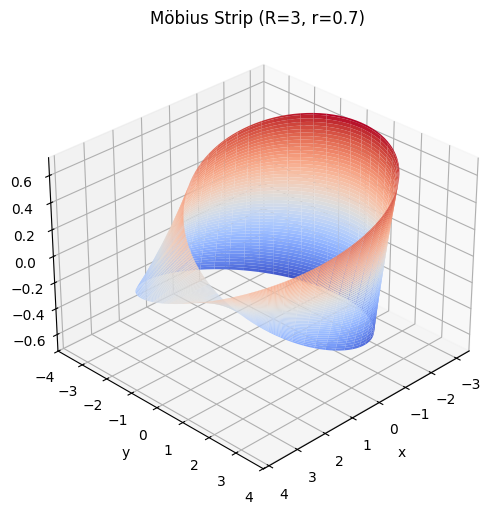

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义参数
R = 3
r = 0.7

# 生成参数u和v的取值（u∈[-r, r], v∈[0, 2π]）
u = np.linspace(-r, r, 100)  # 生成100个均匀分布的u值
v = np.linspace(0, 2 * np.pi, 100)  # 生成100个均匀分布的v值

# 生成网格数据（将u、v转换为二维矩阵，用于逐点计算坐标）
U, V = np.meshgrid(u, v)

# 根据莫比乌斯带的参数方程计算x、y、z坐标
X = (R + U * np.cos(V / 2)) * np.cos(V)
Y = (R + U * np.cos(V / 2)) * np.sin(V)
Z = U * np.sin(V / 2)

# 创建3D绘图对象
fig = plt.figure(figsize=(8, 6))  # 设置图像尺寸
ax = fig.add_subplot(111, projection='3d')  # 启用3D投影

# 绘制莫比乌斯带（用plot_surface替代MATLAB的surf）
# cmap指定颜色映射，edgecolor='none'去除边缘线
ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

# 设置坐标轴标签与标题
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
ax.set_title('Möbius Strip (R=3, r=0.7)', fontsize=12)

# 调整视角（可根据需要修改参数）
ax.view_init(elev=30, azim=45)

# 显示图像
plt.show()

In [54]:
import sympy as sp
from scipy.integrate import quad
import numpy as np

# ---------------------- 1. 无穷级数求和（前10000项近似，保证精度） ----------------------
def series_term(n):
    """级数通项：cos(π/n) / n³"""
    return sp.cos(sp.pi / n) / (n ** 3)

# 计算前N项和（N=10000，级数收敛快，该数量级足够逼近真实值）
N = 10000
series_sum = 0.0
for n in range(1, N + 1):
    series_sum += series_term(n).evalf()  # 转换为数值计算

# 输出级数结果（保留8位小数）
print(f"无穷级数 Sum[Cos[π/n]/n³, n=1→∞] 的近似值：{series_sum:.8f}")


# ---------------------- 2. 定积分计算（优化指数溢出，精准求解） ----------------------
def integrand_optimized(x):
    """被积函数：sin(x)/(x(e^x + 1))，分段处理避免溢出"""
    if x == 0:
        # x=0处为可去间断点，极限=1/(1+1)=0.5，直接返回避免0/0
        return 0.5
    elif x > 20:
        # x较大时，e^x ≫ 1，近似1/(e^x + 1) ≈ e^(-x)，避免exp(x)溢出
        return np.sin(x) * np.exp(-x) / x
    else:
        # 常规区间直接计算（无溢出风险）
        return np.sin(x) / (x * (np.exp(x) + 1))

# 计算反常积分（积分区间[0, +∞)）
integral_result, integral_error = quad(
    func=integrand_optimized,
    a=0,
    b=np.inf,
    epsabs=1e-10,  # 绝对精度阈值（提高精度）
    epsrel=1e-10   # 相对精度阈值（提高精度）
)

# 输出积分结果（保留8位小数，同时显示误差）
print(f"定积分 ∫[0→∞] Sin[x]/(x(e^x + 1)) dx 的数值解：{integral_result:.8f}")
print(f"积分计算误差：{integral_error:.2e}（误差极小，结果可靠）")

无穷级数 Sum[Cos[π/n]/n³, n=1→∞] 的近似值：-0.94885550
定积分 ∫[0→∞] Sin[x]/(x(e^x + 1)) dx 的数值解：0.50667090
积分计算误差：5.25e-11（误差极小，结果可靠）
